## <font color='#444140' size=5px>Information about the used dataset </font> 

Melanoma Skin Cancer Dataset contains 10000 images. Melanoma skin cancer is deadly cancer, early detection and cure can save many lives. This dataset will be useful for developing the deep learning models for accurate classification of melanoma. Dataset consists of 9600 images for training the model and 1000 images for evaluation of model.This dataset contains two classes of melanoma cancer, malignant and benign

## <font color='#444140' size=5px>Import Libraries </font> 

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
# Necessary Dependencies
!pip install utils
from utils import *
from glob import glob
from sklearn.model_selection import train_test_split
from itertools import chain
from datetime import datetime
import statistics
import seaborn as sn
from tqdm import tqdm
# TL Models Dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, VGG16, ResNet50
from keras import backend as K
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import keras
import matplotlib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import roc_curve, auc
print("started")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
started


## <font color='#444140' size=5px>Get Paths</font> 

In [5]:
trainpath = '/content/drive/My Drive/Neural Network Project/melanoma_cancer_dataset/train'
testpath = '/content/drive/My Drive/Neural Network Project/melanoma_cancer_dataset/test'

## <font color='#444140' size=5px>Opening Folders</font> 

In [ ]:
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + '/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 4625 in folder malignant
For training data , found 5020 in folder benign


In [ ]:
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + '/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 500 in folder malignant
For training data , found 500 in folder benign


## <font color='#444140' size=5px>Get Code Function</font> 

In [ ]:
#getcode function return label of feature
#code[folder] return code either 0 or 1

code = {'benign':0 ,'malignant':1} #creating dic for encoding

def getcode(n) : #n is a integer number either 0 or 1 {0 for benign, 1 for malignant}
    for x , y in code.items() : 
        if n == y : 
            return x    #returning benign for 0 and malignant for 1

## <font color='#444140' size=5px>Checking Size of Images</font> 

Checking Size of Images in Train Data

In [ ]:
size = []
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(300, 300, 3)    9609
dtype: int64

Checking Size of Images in Test Data

In [ ]:
size = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(300, 300, 3)    1000
dtype: int64

## <font color='#444140' size=5px>Reading Images</font> 

In [ ]:
#code = {'benign':0 ,'malignant':1} #creating dic for encoding
s = 300 #Size of each image used for resize
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + '/' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s), )
        X_test.append(list(image_array))
        y_test.append(code[folder])

## <font color='#444140' size=5px>Displaying Random Images</font> 

## <font color='#00749C' size=5px>Train Data with their Labels</font> 

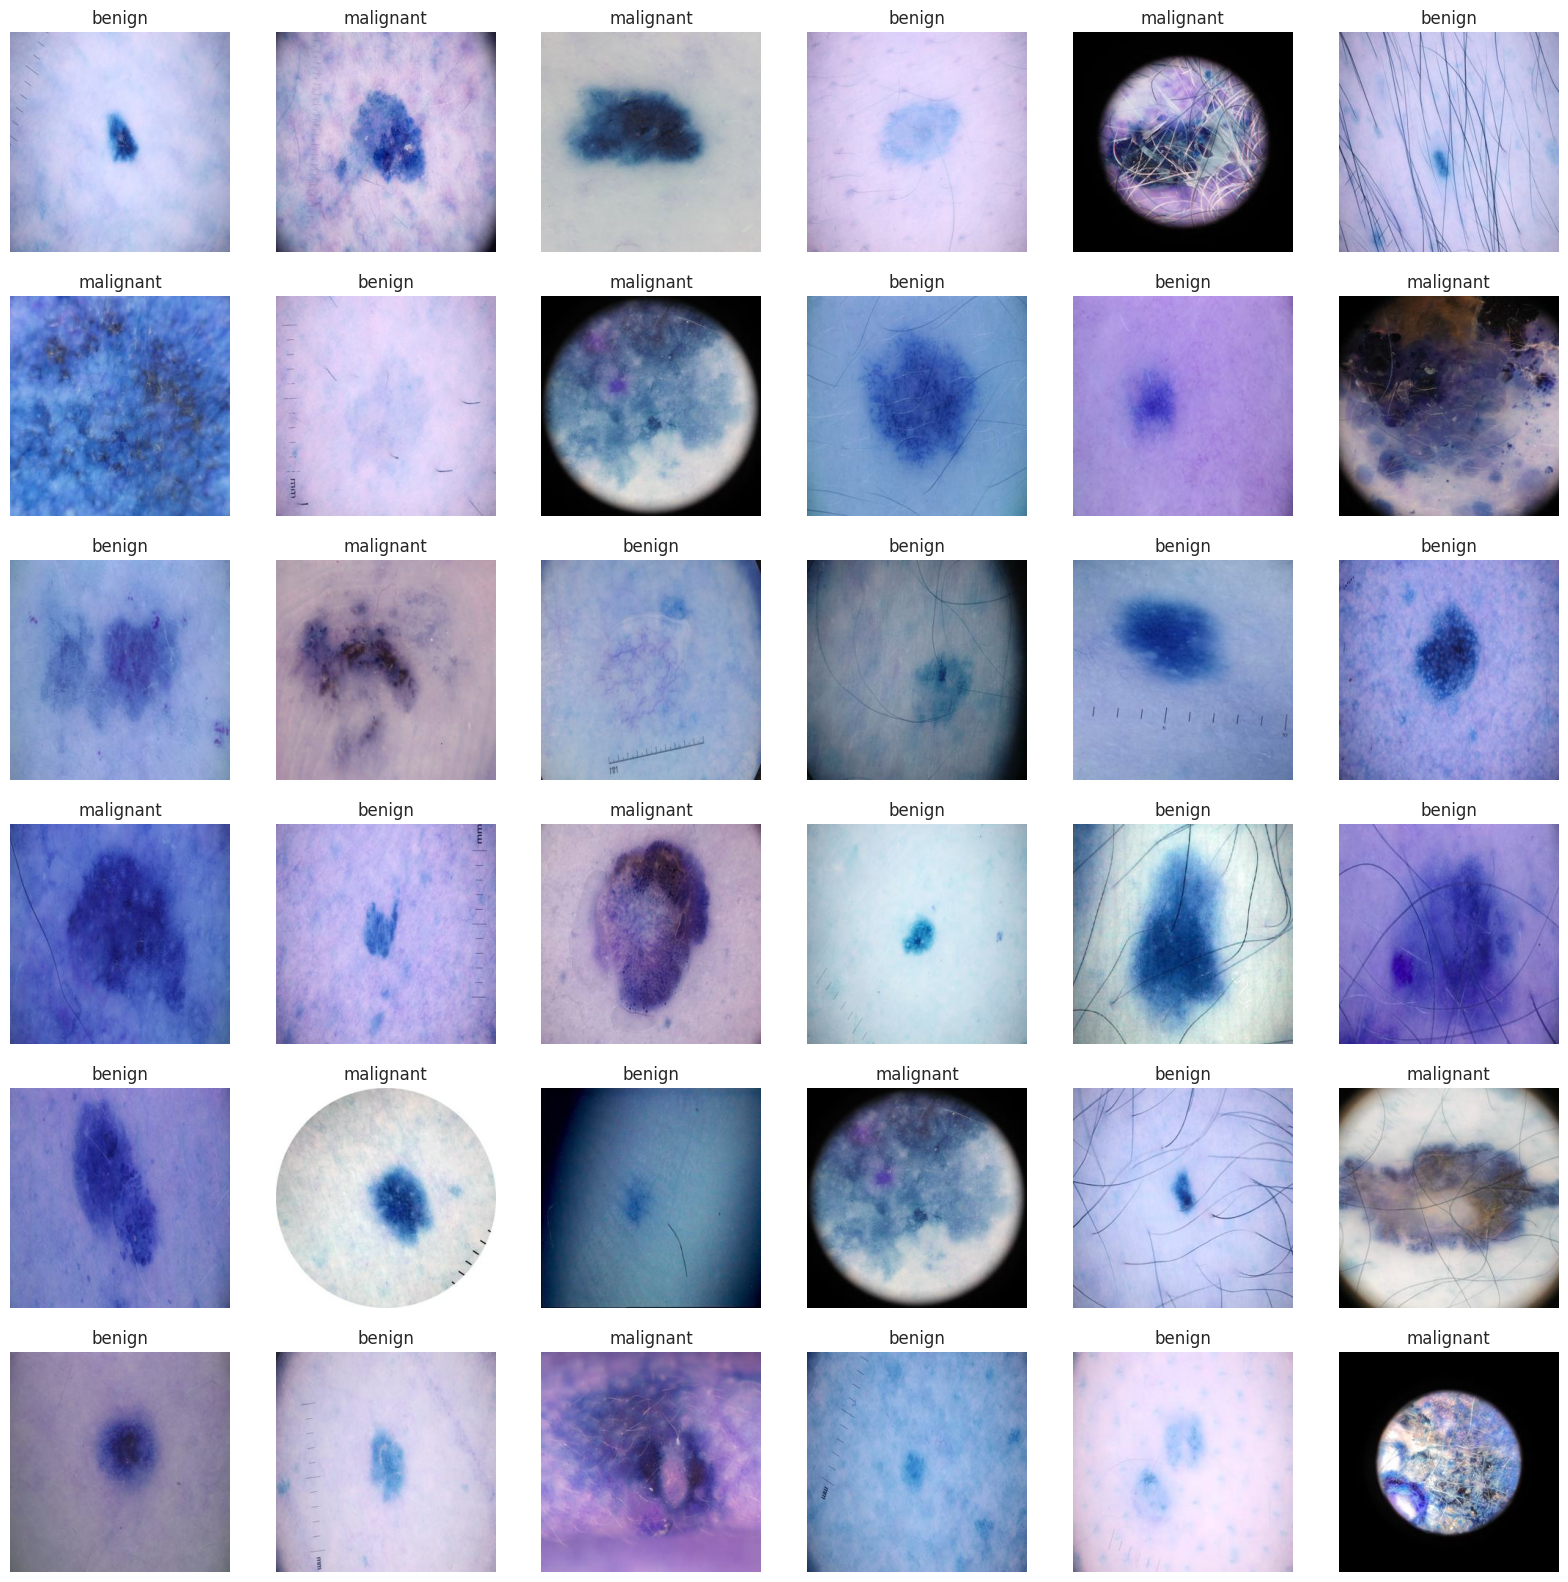

In [ ]:
#getcode function return label of feature
#code[folder] return code either 0 or 1
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

## <font color='#00749C' size=5px>Test Data with their Labels</font> 

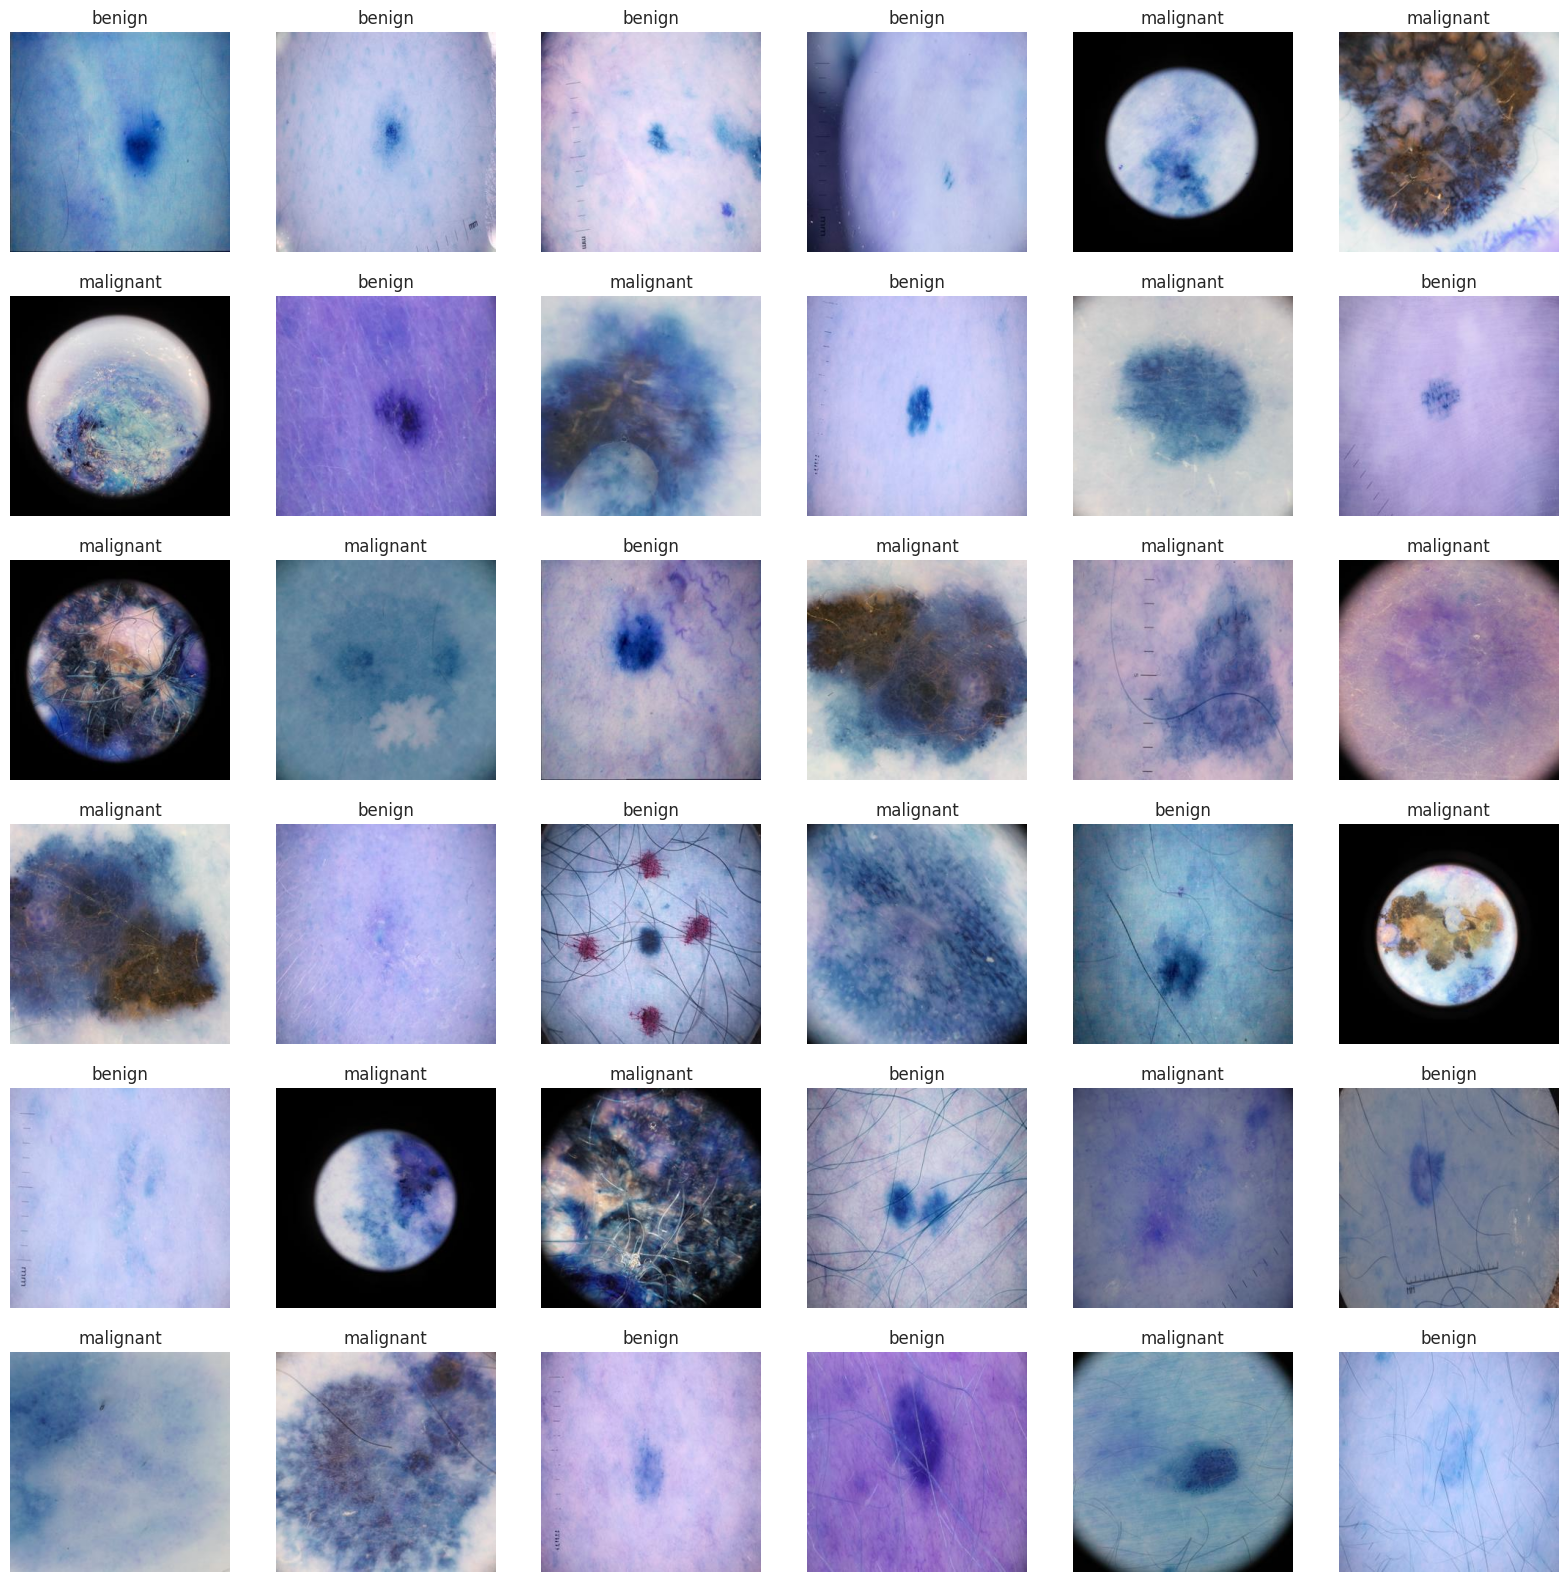

In [ ]:
#getcode function return label of feature
#code[folder] return code either 0 or 1
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

## <font color='#444140' size=5px>Preparing CNN Model</font> 

In [ ]:
#Data Augmentation
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                         rotation_range = 20 ,
                                                         horizontal_flip = True ,
                                                         validation_split = 0.25)

valid_gen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          validation_split = 0.25)

test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(trainpath,
                                           subset='training',
                                           target_size=(224,224),
                                           batch_size=64,
                                           color_mode='rgb', 
                                           class_mode='categorical',
                                           shuffle=True)

valid_data = valid_gen.flow_from_directory(trainpath,
                                          subset='validation',
                                          target_size=(224,224),
                                          batch_size=64,
                                          color_mode='rgb',                                          
                                          class_mode='categorical',
                                          shuffle=False)

test_data = test_gen.flow_from_directory(testpath,
                                         target_size=(224,224),
                                         batch_size=64,
                                         color_mode='rgb',                                          
                                         class_mode='categorical',
                                         shuffle=False)

Found 7234 images belonging to 2 classes.
Found 2411 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

def get_callbacks(model_name):
    callbacks = []
    
    # ModelCheckpoint callback to save the weights of the model after each epoch
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'model.{model_name}.h5',
                                                    verbose=1,
                                                    monitor='val_loss',
                                                    save_best_only=True,
                                                    save_weights_only=True)
    callbacks.append(checkpoint)
    
    # ReduceLROnPlateau callback to reduce the learning rate if the validation loss does not improve
    anne = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.5,
                                                patience=5,
                                                verbose=2,
                                                min_lr=0.0000001,
                                                mode='auto')
    callbacks.append(anne)
    
    # EarlyStopping callback to stop training if the validation loss does not improve after a certain number of epochs
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=10)
    callbacks.append(earlystop)
    
    return callbacks

## <font color='#00749C' size=5px> CNN Model </font> 

In [ ]:
size = 224
model = keras.models.Sequential([
        keras.layers.Conv2D(32, 3, activation='relu',input_shape=(size,size,3)),
        keras.layers.Dropout(0.1) ,
        keras.layers.MaxPooling2D(), 
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.Dropout(0.15) ,
        keras.layers.MaxPooling2D(), 
        keras.layers.Flatten() ,               
        keras.layers.Dense(128,activation='relu') ,    
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(2,activation='softmax') ,    
        ])

In [ ]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details : ')
print(model.summary())

Model Details : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 dropout (Dropout)           (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                   

In [ ]:
callbacks = get_callbacks('CNN_Model')

In [ ]:
CNN_Model = model.fit_generator(train_data,
                                validation_data=valid_data,
                                epochs = 15)

<ipython-input-42-61e437f478e8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CNN_Model = model.fit_generator(train_data,


Epoch 1/15
114/114 [==============================] - 131s 1s/step - loss: 0.2816 - accuracy: 0.8782 - val_loss: 0.2387 - val_accuracy: 0.8992
Epoch 2/15
114/114 [==============================] - 128s 1s/step - loss: 0.2518 - accuracy: 0.8952 - val_loss: 0.2432 - val_accuracy: 0.9050
Epoch 3/15
114/114 [==============================] - 127s 1s/step - loss: 0.2460 - accuracy: 0.8960 - val_loss: 0.2642 - val_accuracy: 0.8951
Epoch 4/15
114/114 [==============================] - 128s 1s/step - loss: 0.2420 - accuracy: 0.8931 - val_loss: 0.2558 - val_accuracy: 0.8976
Epoch 5/15
114/114 [==============================] - 129s 1s/step - loss: 0.2392 - accuracy: 0.8962 - val_loss: 0.2422 - val_accuracy: 0.9034
Epoch 6/15
114/114 [==============================] - 130s 1s/step - loss: 0.2418 - accuracy: 0.8949 - val_loss: 0.2302 - val_accuracy: 0.9029
Epoch 7/15
114/114 [==============================] - 130s 1s/step - loss: 0.2370 - accuracy: 0.9007 - val_loss: 0.2506 - val_accuracy: 0.8946

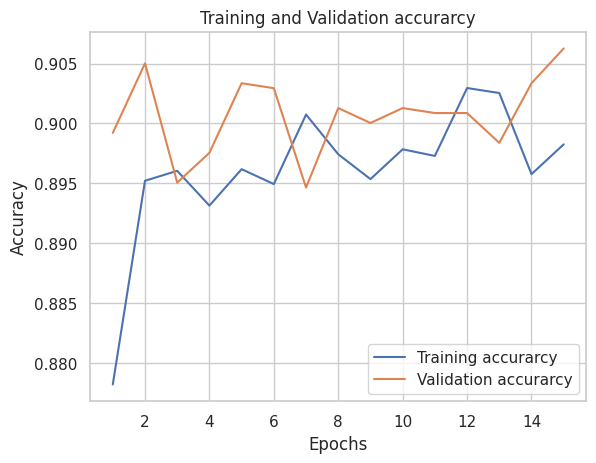

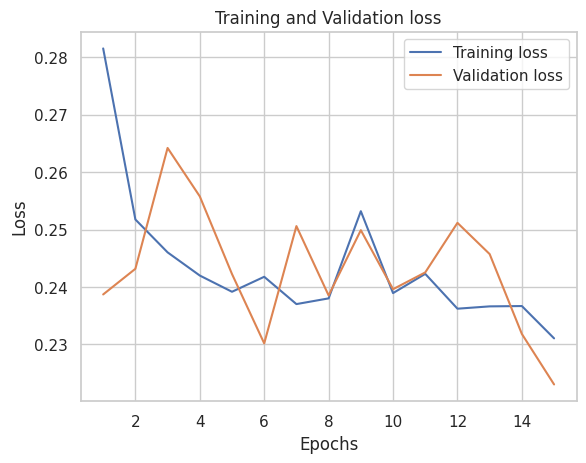

In [ ]:
acc = CNN_Model.history['accuracy']
val_acc = CNN_Model.history['val_accuracy']
loss = CNN_Model.history['loss']
val_loss = CNN_Model.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, label='Training accurarcy')
plt.plot(epochs, val_acc, label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
#Train and validation lass
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the Keras model
model.save('CNN_Model.h5')

In [ ]:
# Load the saved model
model = tf.keras.models.load_model('CNN_Model.h5')

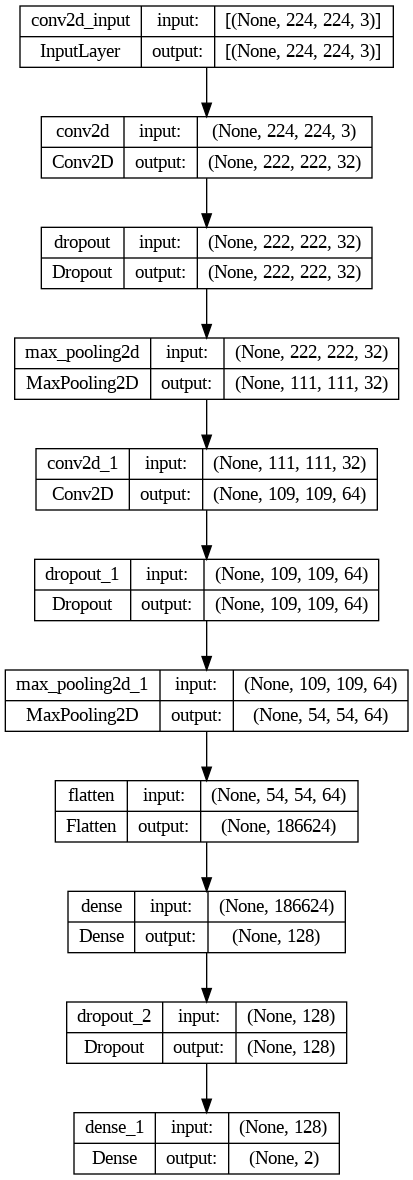

In [ ]:
keras.utils.plot_model(
    model,
    to_file="CNN_Model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
results = model.evaluate(test_data, verbose=1)

16/16 [==============================] - 5s 287ms/step - loss: 0.2304 - accuracy: 0.9130


In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

16/16 [==============================] - 5s 297ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       500
           1       0.93      0.89      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



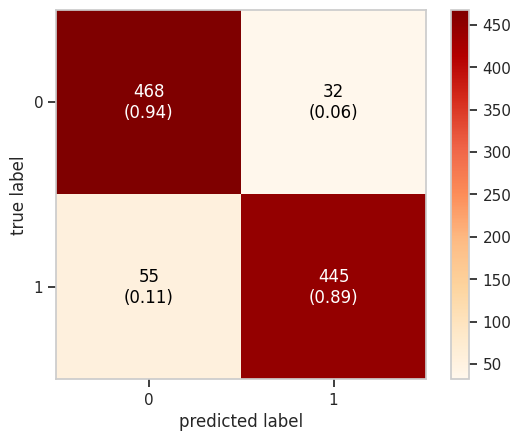

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(test_data.classes, y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='OrRd')
plt.show()

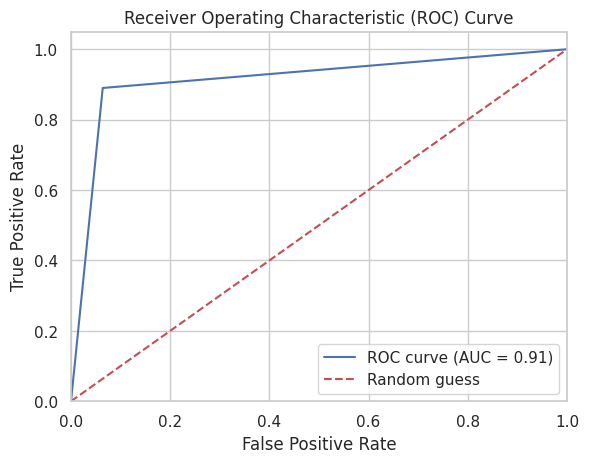

In [ ]:
# Compute the FPR and TPR for different classification thresholds
fpr, tpr, thresholds = roc_curve(test_data.classes, y_pred)
#y_true = test_data.classes
#y_scores = Y_pred
# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## <font color='#444140' size=5px>Preparing Transfer Learning Models</font> 

In [ ]:
def Opening_Folders():
    path, dirs, files = next(os.walk("/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train/benign"))
    #path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/melanoma_cancer_dataset/train/benign"))
    files_count = len(files)
    print('benign :', files_count)
    path, dirs, files = next(os.walk("/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train/malignant"))
    #path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/melanoma_cancer_dataset/train/malignant"))
    files_count = len(files)
    print('malignant :', files_count)

In [ ]:
def get_callbacks(model_name):
    callbacks = []
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'model.{model_name}.h5',verbose=1,monitor='val_loss',mode='min')
    callbacks.append(checkpoint)
    anne = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=2, min_lr=0.0000001,min_delta=0.00001,mode='auto')
    callbacks.append(anne)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
    callbacks.append(earlystop)
    return callbacks

In [ ]:
def graph(model):
  acc = model.history['accuracy']
  val_acc = model.history['val_accuracy']
  loss = model.history['loss']
  val_loss = model.history['val_loss']
  epochs = range(1, len(acc) + 1)

  #Train and validation accuracy
  plt.plot(epochs, acc, label='Training accurarcy')
  plt.plot(epochs, val_acc, label='Validation accurarcy')
  plt.title('Training and Validation accurarcy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.figure()
  #Train and validation lass
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def classificationReport(y_true, y_pred):
  target_names = ['benign', 'malignant']
  print(classification_report(y_true, y_pred, target_names=target_names, digits=4))  

In [ ]:
def confusionMatrix(y_true, y_pred):
  target_names = ['benign', 'malignant']

  disp = confusion_matrix(y_true, y_pred)
  disp.astype("int")
  pd.options.display.float_format = '{:.5f}'.format

  df_cm = pd.DataFrame(disp, target_names, target_names)
  fig, ax = plt.subplots()
  sn.set(font_scale=1.5) # for label size
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 15},ax=ax, cmap="YlOrBr", fmt='g', cbar=False)
  plt.ylabel('Actual', fontsize=20)
  plt.xlabel('Predicted', fontsize=20)
  plt.ioff()
  plt.savefig("confusion_mat", bbox_inches='tight')
  plt.show()

In [ ]:
def AUC(y_true, y_pred):
  # Compute the FPR and TPR for different classification thresholds
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  #y_true = test_data.classes
  #y_scores = Y_pred
  # Compute the AUC score
  auc_score = auc(fpr, tpr)

  # Plot the ROC curve
  plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random guess')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

## <font color='#3379B7'>1. Xception Model </font> 


In [ ]:
Opening_Folders()

benign : 5000
malignant : 4609


In [ ]:
image_size = (224, 224)
batch_size = 32

trainSet = tf.keras.preprocessing.image_dataset_from_directory(
   #"/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   trainpath,
   validation_split=0.2,
   subset="training",
   seed=100,
   image_size=image_size,
   batch_size=batch_size,
)

valSet = tf.keras.preprocessing.image_dataset_from_directory(
   #"/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   trainpath,
   validation_split=0.2,
   subset="validation",
   seed=150,
   image_size=image_size,
   batch_size=batch_size,
)

testSet = tf.keras.preprocessing.image_dataset_from_directory(
   #"/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/test",
   testpath,
   seed=200,
   image_size=image_size,
   batch_size=batch_size,
   shuffle=False,
)

Found 9613 files belonging to 2 classes.
Using 7691 files for training.
Found 9613 files belonging to 2 classes.
Using 1922 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
y_true = np.concatenate([y for x, y in testSet], axis=0)

In [ ]:
trainSet = trainSet.prefetch(buffer_size=32)
testSet = testSet.prefetch(buffer_size=32)

In [ ]:
#Hyperparameters
IMG_IND = 224
IMG_SHAPE = (IMG_IND, IMG_IND, 3)
LOSS = BinaryCrossentropy() # not un weighted
IMG_SIZE = (224, 224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(
    learning_rate=0.001, 
    beta_1=0.9, 
    beta_2=0.999
)

base_model = tf.keras.applications.Xception(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(1, activation='sigmoid', name='Final')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(
    loss=LOSS,
    optimizer=OPTIMIZER,
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
    ]
)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
callbacks = get_callbacks('Xception')
Xception = model.fit(trainSet,
                   epochs=20,
                   validation_data=valSet,
                   callbacks=[callbacks])

Epoch 1/20
241/241 [==============================] - ETA: 0s - loss: 0.2482 - accuracy: 0.9052 - precision: 0.9206 - recall: 0.8779 - auc: 0.9615 - true_positives: 3234.0000 - false_positives: 279.0000 - true_negatives: 3728.0000 - false_negatives: 450.0000 - specificity_at_sensitivity: 0.9955 - sensitivity_at_specificity: 0.9862
Epoch 1: saving model to model.Xception.h5
241/241 [==============================] - 922s 4s/step - loss: 0.2482 - accuracy: 0.9052 - precision: 0.9206 - recall: 0.8779 - auc: 0.9615 - true_positives: 3234.0000 - false_positives: 279.0000 - true_negatives: 3728.0000 - false_negatives: 450.0000 - specificity_at_sensitivity: 0.9955 - sensitivity_at_specificity: 0.9862 - val_loss: 0.2337 - val_accuracy: 0.9360 - val_precision: 0.9678 - val_recall: 0.8895 - val_auc: 0.9706 - val_true_positives: 781.0000 - val_false_positives: 26.0000 - val_true_negatives: 1018.0000 - val_false_negatives: 97.0000 - val_specificity_at_sensitivity: 0.9990 - val_sensitivity_at_speci

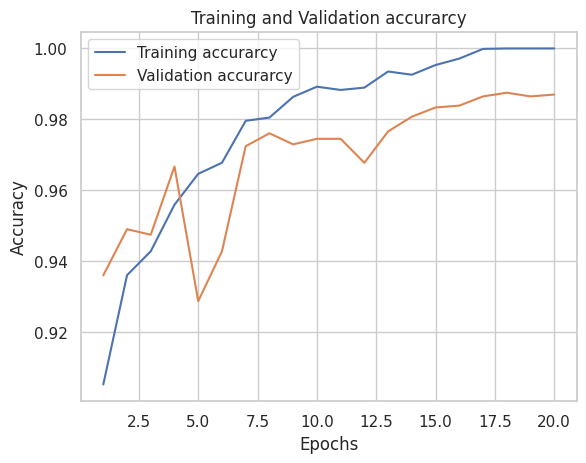

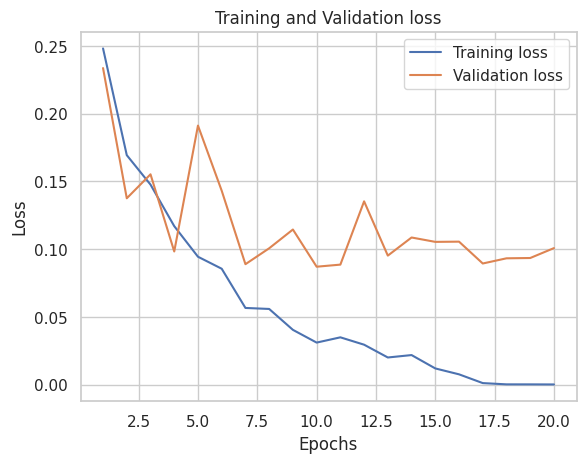

In [ ]:
graph(Xception)

In [ ]:
model.save('Xception_Model.h5')

In [ ]:
model = tf.keras.models.load_model('Xception_Model.h5')

In [ ]:
results = model.evaluate(testSet, verbose=1)

32/32 [==============================] - 7s 165ms/step - loss: 0.6654 - accuracy: 0.9120 - precision: 0.9518 - recall: 0.8680 - auc: 0.9436 - true_positives: 434.0000 - false_positives: 22.0000 - true_negatives: 478.0000 - false_negatives: 66.0000 - specificity_at_sensitivity: 0.9920 - sensitivity_at_specificity: 0.9100


In [ ]:
y_pred = model.predict(testSet,verbose=1).round()
y_pred = y_pred.flatten()

32/32 [==============================] - 5s 161ms/step


In [ ]:
classificationReport(y_true, y_pred)

              precision    recall  f1-score   support

      benign     0.8787    0.9560    0.9157       500
   malignant     0.9518    0.8680    0.9079       500

    accuracy                         0.9120      1000
   macro avg     0.9152    0.9120    0.9118      1000
weighted avg     0.9152    0.9120    0.9118      1000



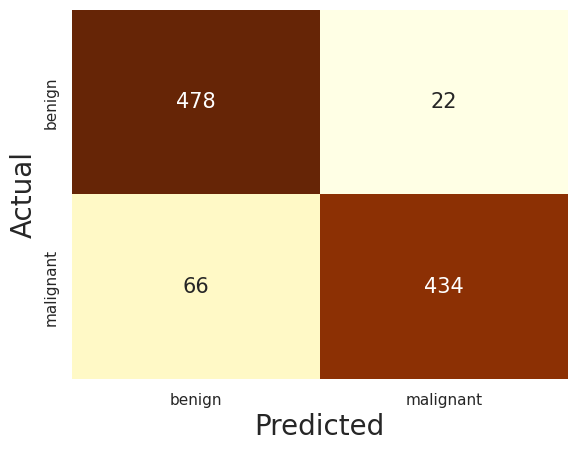

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusionMatrix(y_true, y_pred)

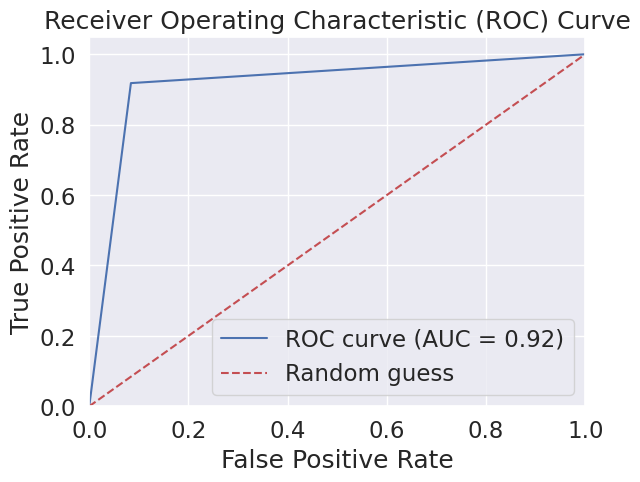

In [ ]:
AUC(y_true, y_pred)

## <font color='#3379B7'>2. InceptionV3 Model </font> 


In [ ]:
Opening_Folders()

benign : 5000
malignant : 4609


In [ ]:
image_size = (224, 224)
batch_size = 32

trainSet = tf.keras.preprocessing.image_dataset_from_directory(
  #  "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   trainpath,
   validation_split=0.2,
   subset="training",
   seed=100,
   image_size=image_size,
   batch_size=batch_size,
)

valSet = tf.keras.preprocessing.image_dataset_from_directory(
  #  "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   trainpath,
   validation_split=0.2,
   subset="validation",
   seed=150,
   image_size=image_size,
   batch_size=batch_size,
)

testSet = tf.keras.preprocessing.image_dataset_from_directory(
  #  "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/test",
   testpath,
   seed=200,
   image_size=image_size,
   batch_size=batch_size,
   shuffle=False,
)

Found 9613 files belonging to 2 classes.
Using 7691 files for training.
Found 9613 files belonging to 2 classes.
Using 1922 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
y_true = np.concatenate([y for x , y in testSet] , axis = 0)

In [ ]:
img_index = 224
img_shape = (img_index , img_index , 3)
img_size = (224 , 224)
seed = 2
BATCH_SIZE = 16

In [ ]:
# Load the pre-trained InceptionV3 model without the top layer
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape)
base_model.trainable =  True 

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add the output layer with sigmoid activation function
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with binary crossentropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
    ]
)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
callbacks = get_callbacks('InceptionV3')
InceptionV3 = model.fit(trainSet,
                        epochs=20,
                        validation_data=valSet,
                        callbacks=[callbacks])


Epoch 1/20
241/241 [==============================] - ETA: 0s - loss: 0.3242 - accuracy: 0.8734 - precision: 0.8834 - recall: 0.8474 - auc: 0.9390 - true_positives: 3122.0000 - false_positives: 412.0000 - true_negatives: 3595.0000 - false_negatives: 562.0000 - specificity_at_sensitivity: 0.9875 - sensitivity_at_specificity: 0.9769
Epoch 1: saving model to model.InceptionV3.h5
241/241 [==============================] - 930s 4s/step - loss: 0.3242 - accuracy: 0.8734 - precision: 0.8834 - recall: 0.8474 - auc: 0.9390 - true_positives: 3122.0000 - false_positives: 412.0000 - true_negatives: 3595.0000 - false_negatives: 562.0000 - specificity_at_sensitivity: 0.9875 - sensitivity_at_specificity: 0.9769 - val_loss: 1.3331 - val_accuracy: 0.6909 - val_precision: 0.5970 - val_recall: 0.9954 - val_auc: 0.8934 - val_true_positives: 874.0000 - val_false_positives: 590.0000 - val_true_negatives: 454.0000 - val_false_negatives: 4.0000 - val_specificity_at_sensitivity: 0.8343 - val_sensitivity_at_spe

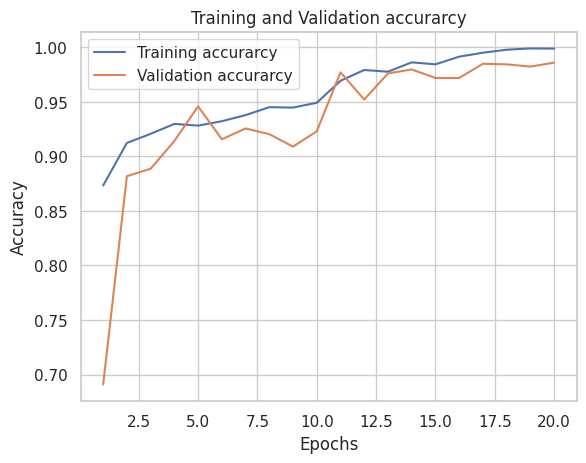

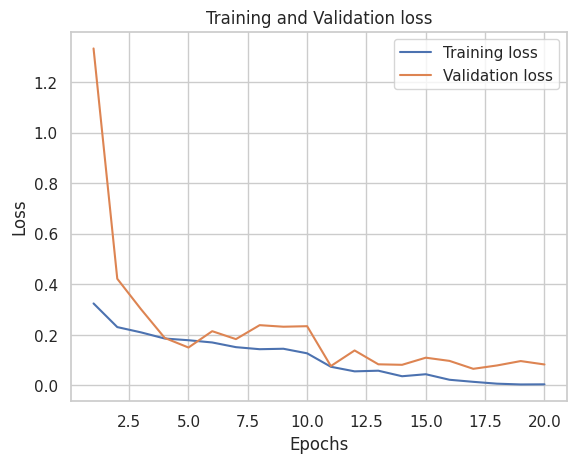

In [ ]:
graph(InceptionV3)

In [ ]:
model.save('InceptionV3.h5')

In [ ]:
model = tf.keras.models.load_model('InceptionV3.h5')

In [ ]:
results = model.evaluate(testSet , verbose = 1 )

32/32 [==============================] - 5s 113ms/step - loss: 0.5762 - accuracy: 0.9200 - precision: 0.9506 - recall: 0.8860 - auc: 0.9469 - true_positives: 443.0000 - false_positives: 23.0000 - true_negatives: 477.0000 - false_negatives: 57.0000 - specificity_at_sensitivity: 0.9820 - sensitivity_at_specificity: 0.9280


In [ ]:
y_pred = model.predict(testSet,verbose=1).round()
y_pred = y_pred.flatten()

32/32 [==============================] - 5s 105ms/step


In [ ]:
classificationReport(y_true, y_pred)

              precision    recall  f1-score   support

      benign     0.8933    0.9540    0.9226       500
   malignant     0.9506    0.8860    0.9172       500

    accuracy                         0.9200      1000
   macro avg     0.9220    0.9200    0.9199      1000
weighted avg     0.9220    0.9200    0.9199      1000



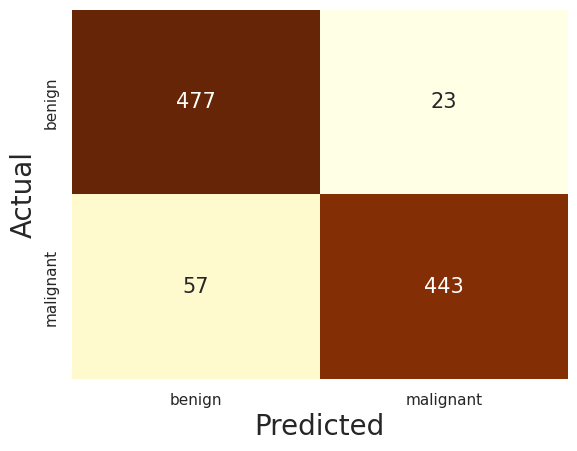

In [ ]:
confusionMatrix(y_true, y_pred)

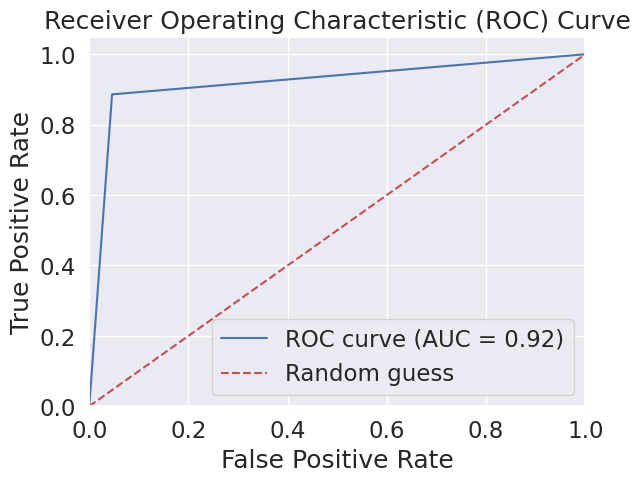

In [ ]:
AUC(y_true, y_pred)

## <font color='#3379B7'>3. DenseNet121 Model </font> 


In [ ]:
Opening_Folders()

benign : 5000
malignant : 4609


In [ ]:
image_size = (224, 224)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
  #  "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   trainpath,
   validation_split=0.2,
   subset="training",
   seed=100,
   image_size=image_size,
   batch_size=batch_size,
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
  #  "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   trainpath,
   validation_split=0.2,
   subset="validation",
   seed=150,
   image_size=image_size,
   batch_size=batch_size,
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
  #  "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/test", 
   testpath,
   seed=200,
   image_size=image_size,
   batch_size=batch_size,
   shuffle=False,
)

Found 9613 files belonging to 2 classes.
Using 7691 files for training.
Found 9613 files belonging to 2 classes.
Using 1922 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
y_true = np.concatenate([y for x, y in test_df], axis=0)

In [ ]:
train_df = train_df.prefetch(buffer_size=32)
val_df   = val_df.prefetch(buffer_size=32)

In [ ]:
# Hyperparameters
IMG_IND = 224
IMG_SHAPE =(IMG_IND,IMG_IND,3)
LOSS = BinaryCrossentropy() #Not un-weighted
IMG_SIZE = (224,224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
# Define the optimizer
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.999)
base_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = True

# Build the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid', name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# model.load_weights(weights_dir)

# Compile the model
model.compile(
    loss='binary_crossentropy',
     optimizer=OPTIMIZER,
      metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
    ],
           )

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
callbacks = get_callbacks('DenseNet121')
DenseNet121 = model.fit( train_df, epochs=10, validation_data=val_df, callbacks=[callbacks])

Epoch 1/10
241/241 [==============================] - ETA: 0s - loss: 0.2737 - accuracy: 0.8917 - precision: 0.8972 - recall: 0.8740 - auc: 0.9543 - true_positives: 3220.0000 - false_positives: 369.0000 - true_negatives: 3638.0000 - false_negatives: 464.0000 - specificity_at_sensitivity: 0.9945 - sensitivity_at_specificity: 0.9851
Epoch 1: saving model to model.DenseNet121.h5
241/241 [==============================] - 842s 3s/step - loss: 0.2737 - accuracy: 0.8917 - precision: 0.8972 - recall: 0.8740 - auc: 0.9543 - true_positives: 3220.0000 - false_positives: 369.0000 - true_negatives: 3638.0000 - false_negatives: 464.0000 - specificity_at_sensitivity: 0.9945 - sensitivity_at_specificity: 0.9851 - val_loss: 0.3670 - val_accuracy: 0.8819 - val_precision: 0.9054 - val_recall: 0.8280 - val_auc: 0.9412 - val_true_positives: 727.0000 - val_false_positives: 76.0000 - val_true_negatives: 968.0000 - val_false_negatives: 151.0000 - val_specificity_at_sensitivity: 0.9933 - val_sensitivity_at_sp

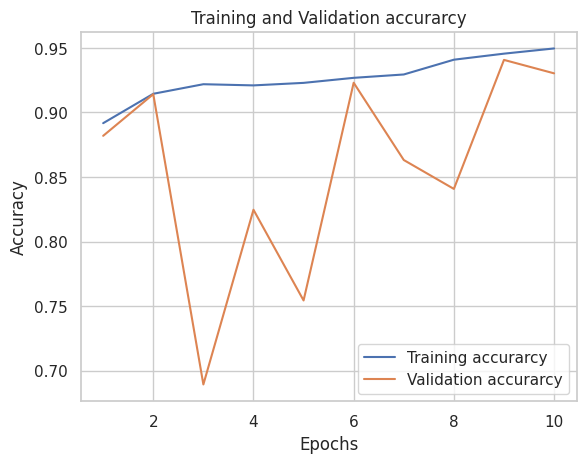

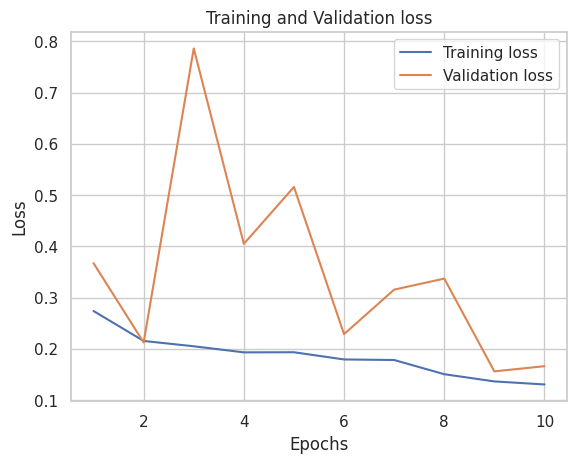

In [ ]:
graph(DenseNet121)

In [ ]:
model.save('DenseNet121.h5')

In [ ]:
model = tf.keras.models.load_model('DenseNet121.h5')

In [ ]:
results = model.evaluate(test_df , verbose = 1 )

32/32 [==============================] - 7s 137ms/step - loss: 0.2251 - accuracy: 0.8980 - precision: 0.8902 - recall: 0.9080 - auc: 0.9722 - true_positives: 454.0000 - false_positives: 56.0000 - true_negatives: 444.0000 - false_negatives: 46.0000 - specificity_at_sensitivity: 0.9980 - sensitivity_at_specificity: 0.9940


In [ ]:
y_pred = model.predict(test_df,verbose=1).round()
y_pred = y_pred.flatten()

32/32 [==============================] - 5s 91ms/step


In [ ]:
classificationReport(y_true, y_pred)

              precision    recall  f1-score   support

      benign     0.9061    0.8880    0.8970       500
   malignant     0.8902    0.9080    0.8990       500

    accuracy                         0.8980      1000
   macro avg     0.8982    0.8980    0.8980      1000
weighted avg     0.8982    0.8980    0.8980      1000



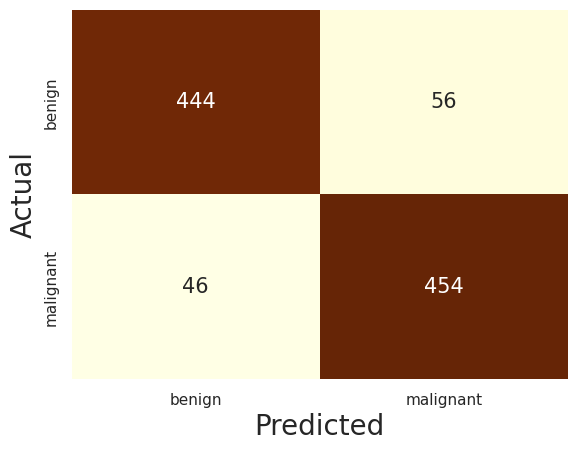

In [ ]:
confusionMatrix(y_true, y_pred)

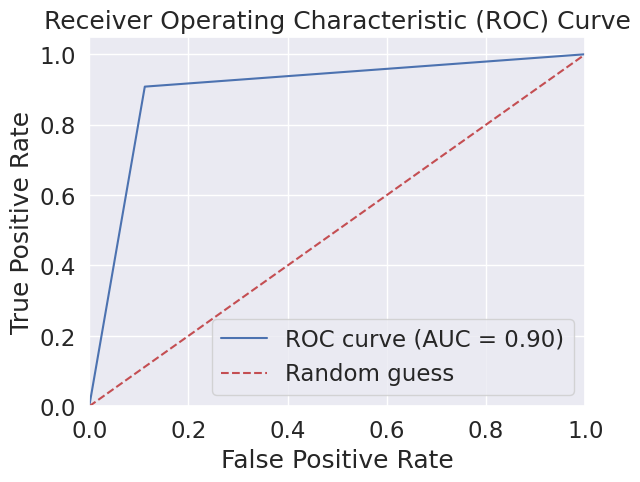

In [ ]:
AUC(y_true, y_pred)

## <font color='#3379B7'>4. ResNet50 Model </font> 

In [ ]:
Opening_Folders()

benign : 5000
malignant : 4609


In [ ]:
image_size = (224, 224)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="training",
   seed=100,
   image_size=image_size,
   batch_size=batch_size,
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="validation",
   seed=150,
   image_size=image_size,
   batch_size=batch_size,
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/test",
   seed=200,
   image_size=image_size,
   batch_size=batch_size,
   shuffle=False,
)



Found 9605 files belonging to 2 classes.
Using 7684 files for training.
Found 9605 files belonging to 2 classes.
Using 1921 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
y_true = np.concatenate([y for x, y in test_df], axis=0)

In [ ]:
train_df = train_df.prefetch(buffer_size=32)
val_df   = val_df.prefetch(buffer_size=32)

In [ ]:
# Hyperparameters
IMG_IND = 224
IMG_SHAPE =(IMG_IND,IMG_IND,3)
LOSS = BinaryCrossentropy() #Not un-weighted
IMG_SIZE = (224,224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
# Define the optimizer
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.999)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = True

# Build the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid', name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# model.load_weights(weights_dir)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
    ])

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
callbacks = get_callbacks('ResNet50')
ResNet50 = model.fit( train_df, epochs=10, validation_data=val_df, callbacks=[callbacks])

Epoch 1/10
241/241 [==============================] - ETA: 0s - loss: 0.3358 - accuracy: 0.8683 - precision: 0.8700 - recall: 0.8525 - auc: 0.9369 - true_positives: 3138.0000 - false_positives: 469.0000 - true_negatives: 3534.0000 - false_negatives: 543.0000 - specificity_at_sensitivity: 0.9878 - sensitivity_at_specificity: 0.9764
Epoch 1: saving model to model.ResNet50.h5
241/241 [==============================] - 1021s 4s/step - loss: 0.3358 - accuracy: 0.8683 - precision: 0.8700 - recall: 0.8525 - auc: 0.9369 - true_positives: 3138.0000 - false_positives: 469.0000 - true_negatives: 3534.0000 - false_negatives: 543.0000 - specificity_at_sensitivity: 0.9878 - sensitivity_at_specificity: 0.9764 - val_loss: 0.2987 - val_accuracy: 0.8532 - val_precision: 0.9686 - val_recall: 0.7019 - val_auc: 0.9629 - val_true_positives: 617.0000 - val_false_positives: 20.0000 - val_true_negatives: 1022.0000 - val_false_negatives: 262.0000 - val_specificity_at_sensitivity: 0.9990 - val_sensitivity_at_spe

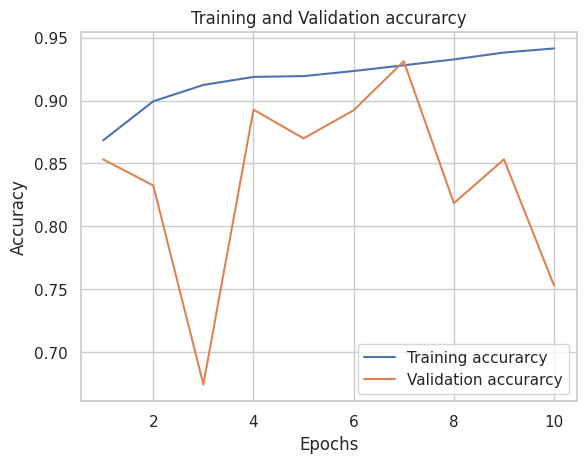

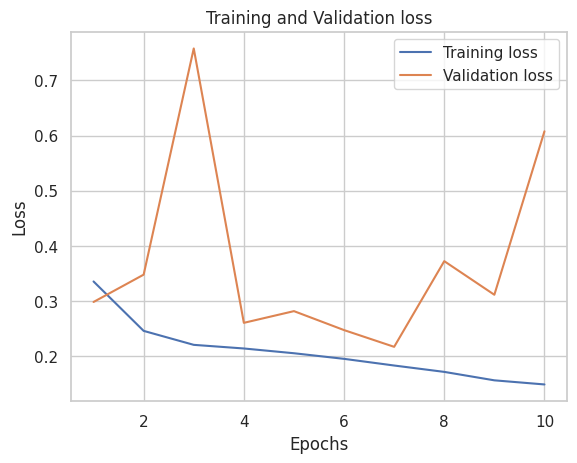

In [ ]:
graph(ResNet50)

In [ ]:
model.save('ResNet50.h5')

In [ ]:
model = tf.keras.models.load_model('ResNet50.h5')

In [ ]:
results = model.evaluate(test_df , verbose = 1)

32/32 [==============================] - 5s 125ms/step - loss: 0.6446 - accuracy: 0.7500 - precision: 0.6776 - recall: 0.9540 - auc: 0.9340 - true_positives: 477.0000 - false_positives: 227.0000 - true_negatives: 273.0000 - false_negatives: 23.0000 - specificity_at_sensitivity: 0.9820 - sensitivity_at_specificity: 0.9580


In [ ]:
y_pred = model.predict(test_df,verbose=1).round()
y_pred = y_pred.flatten()

32/32 [==============================] - 4s 93ms/step


In [ ]:
classificationReport(y_true, y_pred)

              precision    recall  f1-score   support

      benign     0.9223    0.5460    0.6859       500
   malignant     0.6776    0.9540    0.7924       500

    accuracy                         0.7500      1000
   macro avg     0.7999    0.7500    0.7391      1000
weighted avg     0.7999    0.7500    0.7391      1000



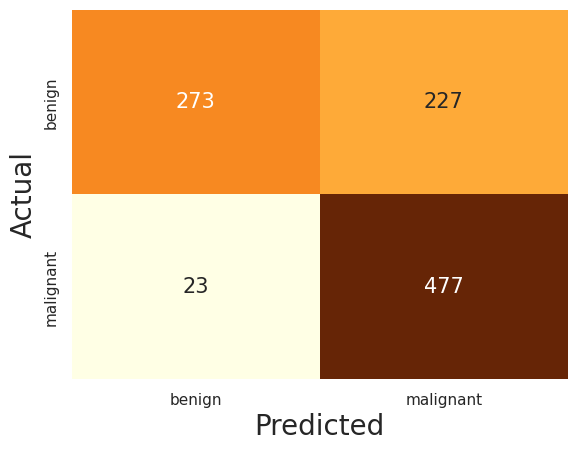

In [ ]:
confusionMatrix(y_true, y_pred)

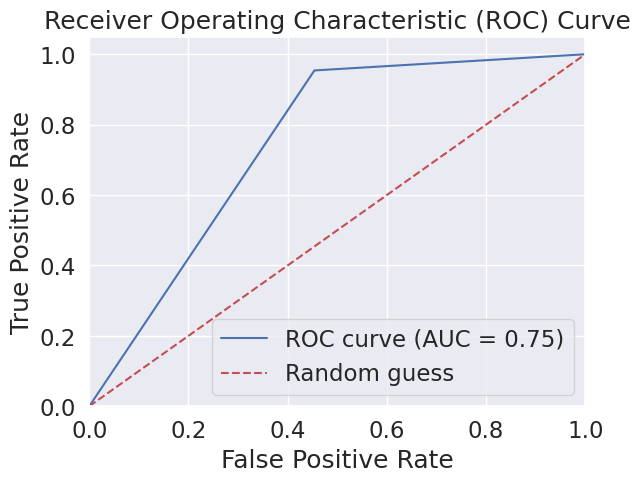

In [ ]:
AUC(y_true, y_pred)

## <font color='#3379B7'>5. VGG16 Model </font> 

In [ ]:
Opening_Folders()

benign : 5000
malignant : 4609


In [ ]:
image_size = (224, 224)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="training",
   seed=100,
   image_size=image_size,
   batch_size=batch_size,
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="validation",
   seed=150,
   image_size=image_size,
   batch_size=batch_size,
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/test",
   seed=200,
   image_size=image_size,
   batch_size=batch_size,
   shuffle=False,
)


Found 9605 files belonging to 2 classes.
Using 7684 files for training.
Found 9605 files belonging to 2 classes.
Using 1921 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
y_true = np.concatenate([y for x, y in test_df], axis=0)

In [ ]:
train_df = train_df.prefetch(buffer_size=32)
val_df   = val_df.prefetch(buffer_size=32)

In [ ]:
# Hyperparameters
IMG_IND = 224
IMG_SHAPE =(IMG_IND,IMG_IND,3)
LOSS = BinaryCrossentropy() #Not un-weighted
IMG_SIZE = (224,224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
# Define the optimizer
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.999)
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = True

# Build the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid', name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# model.load_weights(weights_dir)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
    ]
)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
callbacks = get_callbacks('VGG16')
VGG16 = model.fit( train_df, epochs=10, validation_data=val_df, callbacks=[callbacks])

Epoch 1/10
241/241 [==============================] - ETA: 0s - loss: 2.5164 - accuracy: 0.5377 - precision: 0.5374 - recall: 0.2516 - auc: 0.5334 - true_positives: 926.0000 - false_positives: 797.0000 - true_negatives: 3206.0000 - false_negatives: 2755.0000 - specificity_at_sensitivity: 0.3745 - sensitivity_at_specificity: 0.4754 
Epoch 1: saving model to model.VGG16.h5
241/241 [==============================] - 2994s 12s/step - loss: 2.5164 - accuracy: 0.5377 - precision: 0.5374 - recall: 0.2516 - auc: 0.5334 - true_positives: 926.0000 - false_positives: 797.0000 - true_negatives: 3206.0000 - false_negatives: 2755.0000 - specificity_at_sensitivity: 0.3745 - sensitivity_at_specificity: 0.4754 - val_loss: 0.6926 - val_accuracy: 0.5424 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_true_positives: 0.0000e+00 - val_false_positives: 0.0000e+00 - val_true_negatives: 1042.0000 - val_false_negatives: 879.0000 - val_specificity_at_sensitivity: 0.0000e+00 - val_se

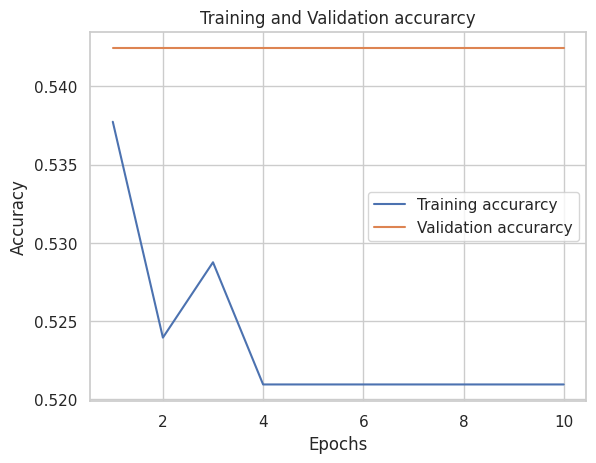

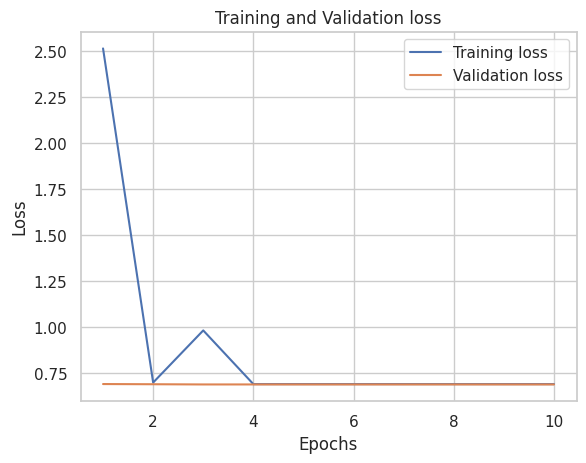

In [ ]:
graph(VGG16)

In [ ]:
model.save('VGG16.h5')

In [ ]:
model = tf.keras.models.load_model('VGG16.h5')

In [ ]:
results = model.evaluate(test_df, verbose=1)

32/32 [==============================] - 6s 160ms/step - loss: 0.6940 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - true_positives: 0.0000e+00 - false_positives: 0.0000e+00 - true_negatives: 500.0000 - false_negatives: 500.0000 - specificity_at_sensitivity: 0.0000e+00 - sensitivity_at_specificity: 0.0000e+00


In [ ]:
y_pred = model.predict(test_df,verbose=1).round()
y_pred = y_pred.flatten()

32/32 [==============================] - 4s 117ms/step


In [ ]:
classificationReport(y_true, y_pred)

              precision    recall  f1-score   support

      benign     0.5000    1.0000    0.6667       500
   malignant     0.0000    0.0000    0.0000       500

    accuracy                         0.5000      1000
   macro avg     0.2500    0.5000    0.3333      1000
weighted avg     0.2500    0.5000    0.3333      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


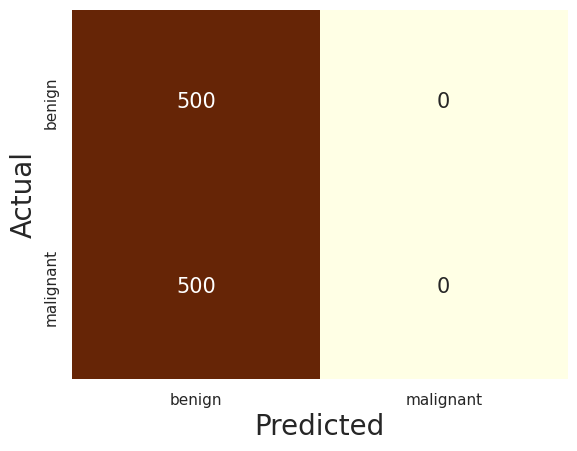

In [ ]:
confusionMatrix(y_true, y_pred)

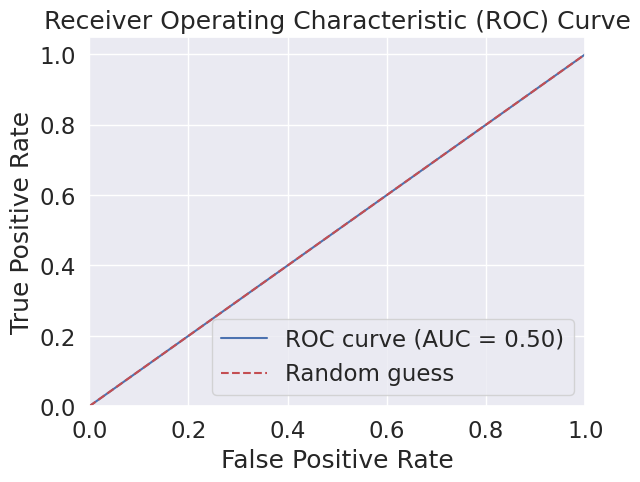

In [ ]:
AUC(y_true, y_pred)

## <font color='#3379B7'>6. EfficientNetB2 Model</font> 

In [ ]:
Opening_Folders()

benign : 5000
malignant : 4605


In [ ]:
image_size = (224, 224)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="training",
   seed=100,
   image_size=image_size,
   batch_size=batch_size,
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="validation",
   seed=150,
   image_size=image_size,
   batch_size=batch_size,
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/test",
   seed=200,
   image_size=image_size,
   batch_size=batch_size,
   shuffle=False,
)


Found 9605 files belonging to 2 classes.
Using 7684 files for training.
Found 9605 files belonging to 2 classes.
Using 1921 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
y_true = np.concatenate([y for x, y in test_df], axis=0)

In [ ]:
train_df = train_df.prefetch(buffer_size=32)
val_df   = val_df.prefetch(buffer_size=32)

In [ ]:
# Hyperparameters
IMG_IND = 224
IMG_SHAPE =(IMG_IND,IMG_IND,3)
LOSS = BinaryCrossentropy() #Not un-weighted
IMG_SIZE = (224,224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(
    learning_rate=0.001, 
    beta_1=0.9, 
    beta_2=0.999
)

base_model = tf.keras.applications.EfficientNetB2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(1, activation='sigmoid', name='Final')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(
    loss='binary_crossentropy',
    optimizer=OPTIMIZER,
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
    ],
)

31790344/31790344 [==============================] - 2s 0us/step


In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [ ]:
def getcallbacks(model_name):
    checkpoint_path = f"{model_name}.h5"
    checkpoint = ModelCheckpoint(
        checkpoint_path,
        save_best_only=True,
        save_weights_only=True,
        monitor="val_loss",
        verbose=1,
    )
    return [checkpoint]

callbacks = getcallbacks('EfficientNetB2')
EfficientNetB2 = model.fit( train_df, epochs=15, validation_data=val_df, callbacks=callbacks)

Epoch 1/15
241/241 [==============================] - ETA: 0s - loss: 0.1737 - accuracy: 0.9328 - precision: 0.9512 - recall: 0.9063 - auc: 0.9794 - true_positives: 3336.0000 - false_positives: 171.0000 - true_negatives: 3832.0000 - false_negatives: 345.0000 - specificity_at_sensitivity: 0.9988 - sensitivity_at_specificity: 0.9948
Epoch 1: val_loss improved from inf to 0.13603, saving model to EfficientNetB2.h5
241/241 [==============================] - 98s 404ms/step - loss: 0.1737 - accuracy: 0.9328 - precision: 0.9512 - recall: 0.9063 - auc: 0.9794 - true_positives: 3336.0000 - false_positives: 171.0000 - true_negatives: 3832.0000 - false_negatives: 345.0000 - specificity_at_sensitivity: 0.9988 - sensitivity_at_specificity: 0.9948 - val_loss: 0.1360 - val_accuracy: 0.9479 - val_precision: 0.9401 - val_recall: 0.9465 - val_auc: 0.9890 - val_true_positives: 832.0000 - val_false_positives: 53.0000 - val_true_negatives: 989.0000 - val_false_negatives: 47.0000 - val_specificity_at_sensit

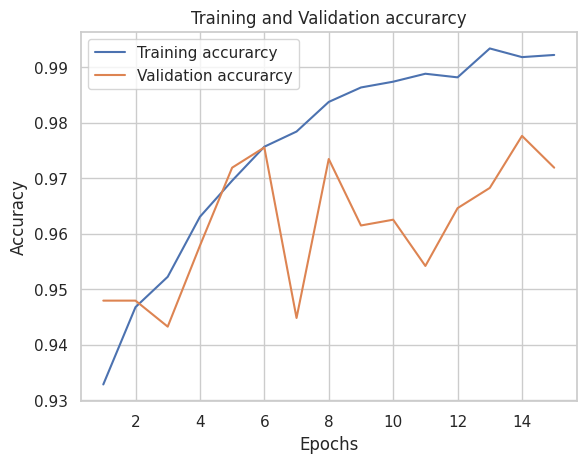

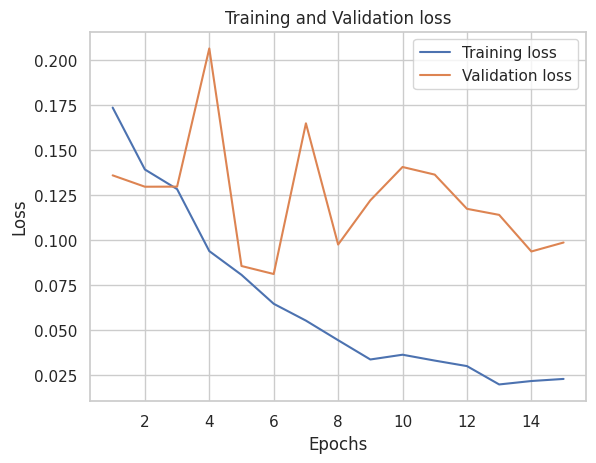

In [ ]:
graph(EfficientNetB2)

In [ ]:
#model.save('EfficientNetB2.h5')

In [ ]:
#model = tf.keras.models.load_model('EfficientNetB2.h5')

In [ ]:
results = model.evaluate(test_df, verbose=1)

32/32 [==============================] - 4s 109ms/step - loss: 0.3524 - accuracy: 0.9170 - precision: 0.9162 - recall: 0.9180 - auc: 0.9620 - true_positives: 459.0000 - false_positives: 42.0000 - true_negatives: 458.0000 - false_negatives: 41.0000 - specificity_at_sensitivity: 0.9880 - sensitivity_at_specificity: 0.9680


In [ ]:
y_pred = model.predict(test_df,verbose=1).round()
y_pred = y_pred.flatten()

32/32 [==============================] - 6s 85ms/step


In [ ]:
classificationReport(y_true, y_pred)

              precision    recall  f1-score   support

      benign     0.9178    0.9160    0.9169       500
   malignant     0.9162    0.9180    0.9171       500

    accuracy                         0.9170      1000
   macro avg     0.9170    0.9170    0.9170      1000
weighted avg     0.9170    0.9170    0.9170      1000



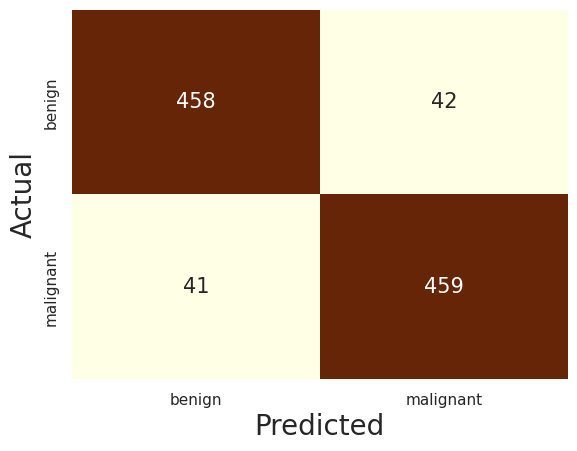

In [ ]:
confusionMatrix(y_true, y_pred)

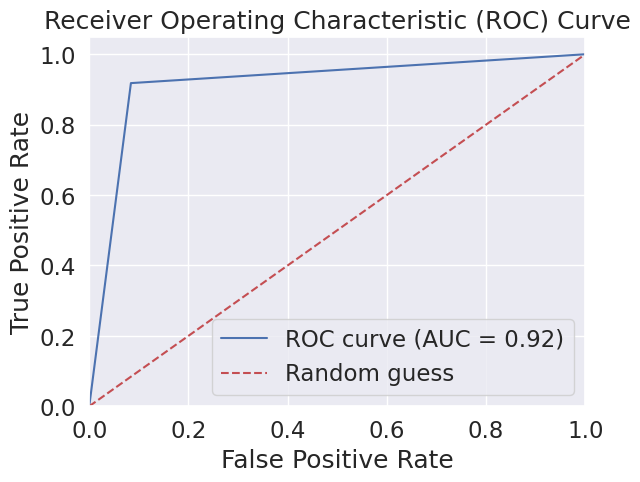

In [ ]:
AUC(y_true, y_pred)

## <font color='#3379B7'>7. EfficientNetB3 Model</font> 

In [ ]:
Opening_Folders()

benign : 5000
malignant : 4609


In [ ]:
image_size = (224, 224)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="training",
   seed=100,
   image_size=image_size,
   batch_size=batch_size,
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="validation",
   seed=150,
   image_size=image_size,
   batch_size=batch_size,
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/test",
   seed=200,
   image_size=image_size,
   batch_size=batch_size,
   shuffle=False,
)


Found 9609 files belonging to 2 classes.
Using 7688 files for training.
Found 9609 files belonging to 2 classes.
Using 1921 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
y_true = np.concatenate([y for x, y in test_df], axis=0)

In [ ]:
train_df = train_df.prefetch(buffer_size=32)
val_df   = val_df.prefetch(buffer_size=32)

In [ ]:
# Hyperparameters
IMG_IND = 224
IMG_SHAPE =(IMG_IND,IMG_IND,3)
LOSS = BinaryCrossentropy() #Not un-weighted
IMG_SIZE = (224,224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(
    learning_rate=0.001, 
    beta_1=0.9, 
    beta_2=0.999
)

base_model = tf.keras.applications.EfficientNetB3(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(1, activation='sigmoid', name='Final')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(
    loss='binary_crossentropy',
    optimizer=OPTIMIZER,
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
    ],
)

43941136/43941136 [==============================] - 3s 0us/step


In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [ ]:
def getcallbacks(model_name):
    checkpoint_path = f"{model_name}.h5"
    checkpoint = ModelCheckpoint(
        checkpoint_path,
        save_best_only=True,
        save_weights_only=True,
        monitor="val_loss",
        verbose=1,
    )
    return [checkpoint]

callbacks = getcallbacks('EfficientNetB3')
EfficientNetB3 = model.fit( train_df, epochs=10, validation_data=val_df, callbacks=[callbacks])

Epoch 1/10
241/241 [==============================] - ETA: 0s - loss: 0.1718 - accuracy: 0.9360 - precision: 0.9552 - recall: 0.9090 - auc: 0.9797 - true_positives: 3347.0000 - false_positives: 157.0000 - true_negatives: 3849.0000 - false_negatives: 335.0000 - specificity_at_sensitivity: 0.9995 - sensitivity_at_specificity: 0.9943
Epoch 1: val_loss improved from inf to 0.15995, saving model to EfficientNetB3.h5
241/241 [==============================] - 133s 547ms/step - loss: 0.1718 - accuracy: 0.9360 - precision: 0.9552 - recall: 0.9090 - auc: 0.9797 - true_positives: 3347.0000 - false_positives: 157.0000 - true_negatives: 3849.0000 - false_negatives: 335.0000 - specificity_at_sensitivity: 0.9995 - sensitivity_at_specificity: 0.9943 - val_loss: 0.1599 - val_accuracy: 0.9422 - val_precision: 0.9292 - val_recall: 0.9451 - val_auc: 0.9882 - val_true_positives: 827.0000 - val_false_positives: 63.0000 - val_true_negatives: 983.0000 - val_false_negatives: 48.0000 - val_specificity_at_sensi

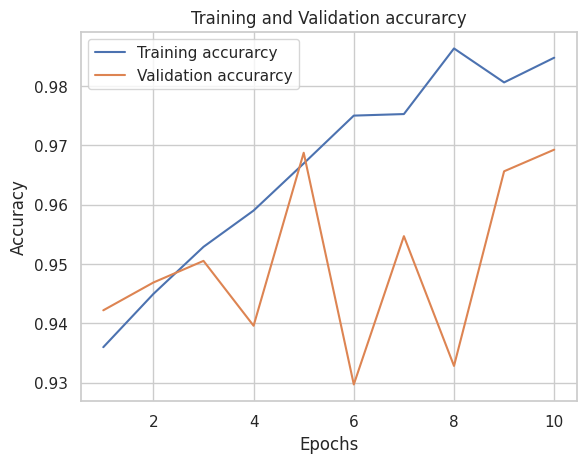

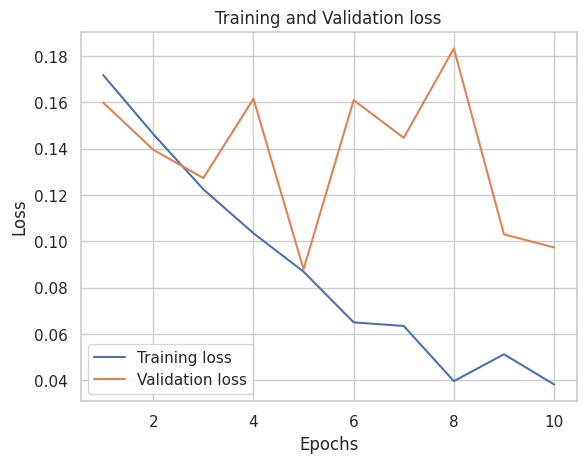

In [ ]:
graph(EfficientNetB3)

In [ ]:
#model.save('EfficientNetB3.h5')

In [ ]:
#model = tf.keras.models.load_model('EfficientNetB3.h5')

In [ ]:
results = model.evaluate(test_df, verbose=1)

32/32 [==============================] - 4s 135ms/step - loss: 0.2970 - accuracy: 0.9100 - precision: 0.9051 - recall: 0.9160 - auc: 0.9682 - true_positives: 458.0000 - false_positives: 48.0000 - true_negatives: 452.0000 - false_negatives: 42.0000 - specificity_at_sensitivity: 0.9960 - sensitivity_at_specificity: 0.9740


In [ ]:
y_pred = model.predict(test_df,verbose=1).round()
y_pred = y_pred.flatten()

32/32 [==============================] - 14s 121ms/step


In [ ]:
classificationReport(y_true, y_pred)

              precision    recall  f1-score   support

      benign     0.9150    0.9040    0.9095       500
   malignant     0.9051    0.9160    0.9105       500

    accuracy                         0.9100      1000
   macro avg     0.9101    0.9100    0.9100      1000
weighted avg     0.9101    0.9100    0.9100      1000



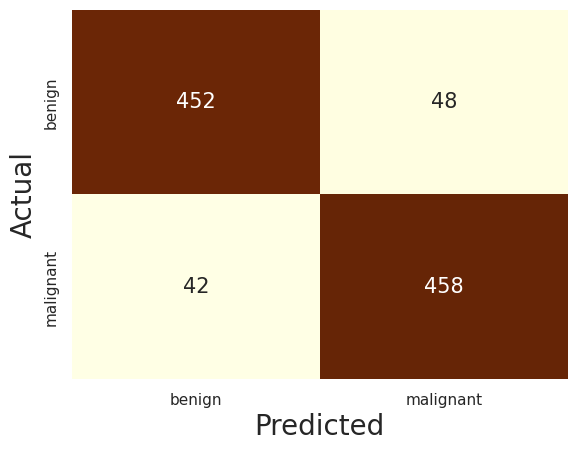

In [ ]:
confusionMatrix(y_true, y_pred)

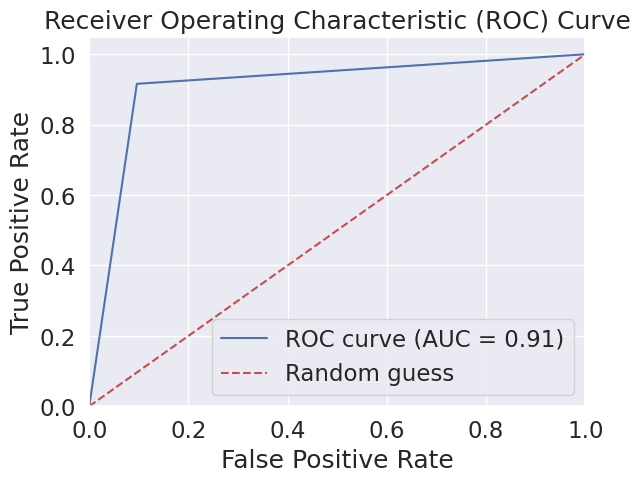

In [ ]:
AUC(y_true, y_pred)

## <font color='#3379B7'>8. EfficientNetB4 Model</font> 

In [ ]:
Opening_Folders()

benign : 5000
malignant : 4609


In [ ]:
image_size = (224, 224)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="training",
   seed=100,
   image_size=image_size,
   batch_size=batch_size,
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/train",
   validation_split=0.2,
   subset="validation",
   seed=150,
   image_size=image_size,
   batch_size=batch_size,
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Neural Network Project/melanoma_cancer_dataset/test",
   seed=200,
   image_size=image_size,
   batch_size=batch_size,
   shuffle=False,
)


Found 9609 files belonging to 2 classes.
Using 7688 files for training.
Found 9609 files belonging to 2 classes.
Using 1921 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
y_true = np.concatenate([y for x, y in test_df], axis=0)

In [ ]:
train_df = train_df.prefetch(buffer_size=32)
val_df   = val_df.prefetch(buffer_size=32)

In [ ]:
# Hyperparameters
IMG_IND = 224
IMG_SHAPE =(IMG_IND,IMG_IND,3)
LOSS = BinaryCrossentropy() #Not un-weighted
IMG_SIZE = (224,224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(
    learning_rate=0.001, 
    beta_1=0.9, 
    beta_2=0.999
)

base_model = tf.keras.applications.EfficientNetB4(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(1, activation='sigmoid', name='Final')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(
    loss='binary_crossentropy',
    optimizer=OPTIMIZER,
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
    ],
)

71686520/71686520 [==============================] - 0s 0us/step


In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [ ]:
def getcallbacks(model_name):
    checkpoint_path = f"{model_name}.h5"
    checkpoint = ModelCheckpoint(
        checkpoint_path,
        save_best_only=True,
        save_weights_only=True,
        monitor="val_loss",
        verbose=1,
    )
    return [checkpoint]

callbacks = getcallbacks('EfficientNetB4')
EfficientNetB4 = model.fit( train_df, epochs=10, validation_data=val_df, callbacks=[callbacks])

Epoch 1/10
241/241 [==============================] - ETA: 0s - loss: 0.2375 - accuracy: 0.9104 - precision: 0.9248 - recall: 0.8848 - auc: 0.9642 - true_positives: 3258.0000 - false_positives: 265.0000 - true_negatives: 3741.0000 - false_negatives: 424.0000 - specificity_at_sensitivity: 0.9970 - sensitivity_at_specificity: 0.9837
Epoch 1: val_loss improved from inf to 0.14440, saving model to EfficientNetB4.h5
241/241 [==============================] - 925s 3s/step - loss: 0.2375 - accuracy: 0.9104 - precision: 0.9248 - recall: 0.8848 - auc: 0.9642 - true_positives: 3258.0000 - false_positives: 265.0000 - true_negatives: 3741.0000 - false_negatives: 424.0000 - specificity_at_sensitivity: 0.9970 - sensitivity_at_specificity: 0.9837 - val_loss: 0.1444 - val_accuracy: 0.9464 - val_precision: 0.9696 - val_recall: 0.9109 - val_auc: 0.9848 - val_true_positives: 797.0000 - val_false_positives: 25.0000 - val_true_negatives: 1021.0000 - val_false_negatives: 78.0000 - val_specificity_at_sensiti

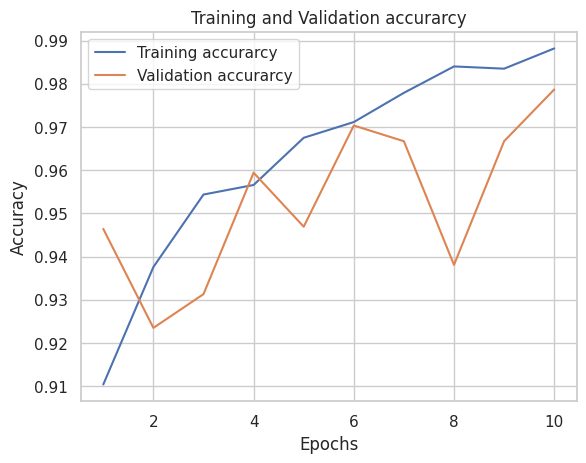

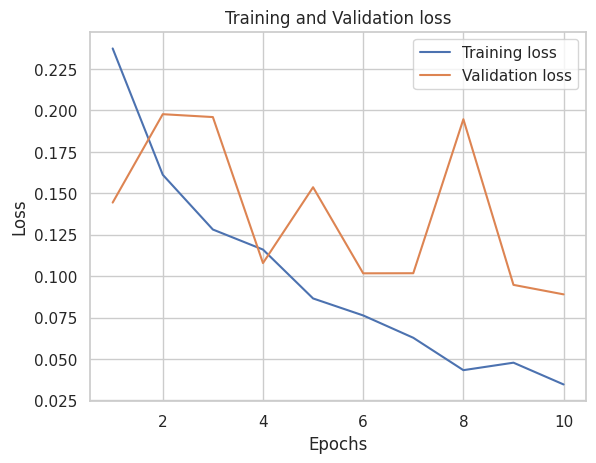

In [ ]:
graph(EfficientNetB4)

In [ ]:
#model.save('EfficientNetB4.h5')

In [ ]:
#model = tf.keras.models.load_model('EfficientNetB4.h5')

In [ ]:
results = model.evaluate(test_df, verbose=1)

32/32 [==============================] - 6s 169ms/step - loss: 0.3664 - accuracy: 0.9190 - precision: 0.9374 - recall: 0.8980 - auc: 0.9609 - true_positives: 449.0000 - false_positives: 30.0000 - true_negatives: 470.0000 - false_negatives: 51.0000 - specificity_at_sensitivity: 0.9920 - sensitivity_at_specificity: 0.9580


In [ ]:
y_pred = model.predict(test_df,verbose=1).round()
y_pred = y_pred.flatten()

32/32 [==============================] - 8s 141ms/step


In [ ]:
classificationReport(y_true, y_pred)

              precision    recall  f1-score   support

      benign     0.9021    0.9400    0.9207       500
   malignant     0.9374    0.8980    0.9173       500

    accuracy                         0.9190      1000
   macro avg     0.9197    0.9190    0.9190      1000
weighted avg     0.9197    0.9190    0.9190      1000



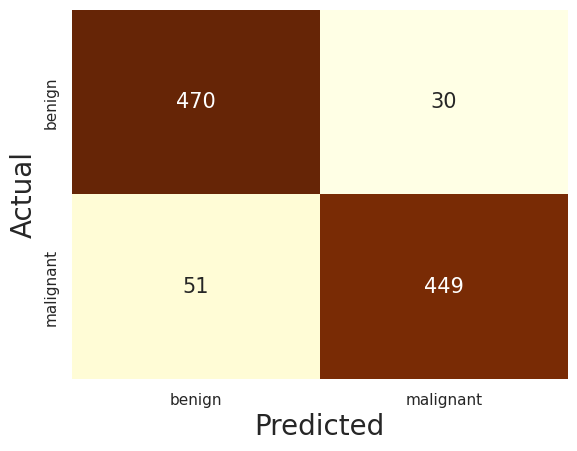

In [ ]:
confusionMatrix(y_true, y_pred)

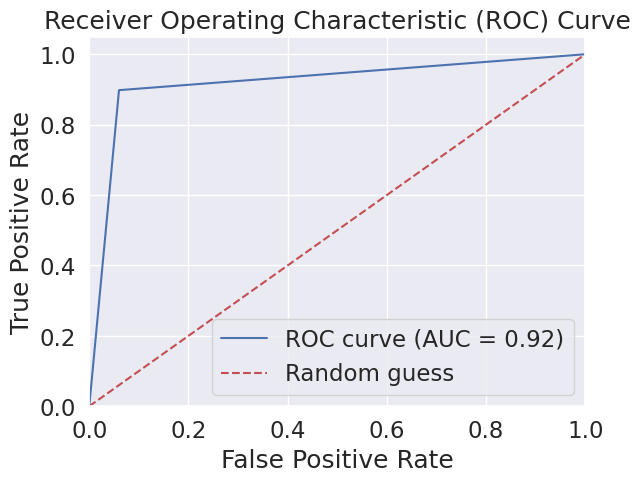

In [ ]:
AUC(y_true, y_pred)